In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('listings.csv')
df.head()
df.shape[0]

6166

In [3]:
pd.set_option('display.max_rows', None)
df = df.drop(['id', 'listing_url', 'scrape_id', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_about', 'host_name', 'host_thumbnail_url', 'host_picture_url', 'neighbourhood'], axis=1)
df.head()

last_scraped  host_since host_location  host_response_time  \
0   2022-12-24  2012-12-15   Seattle, WA      within an hour   
1   2022-12-24  2009-04-26   Seattle, WA        within a day   
2   2022-12-24  2009-04-26   Seattle, WA        within a day   
3   2022-12-24  2012-12-16   Seattle, WA  within a few hours   
4   2022-12-24  2009-08-09   Seattle, WA  within a few hours   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                96%                 100%                 t   
1               100%                  87%                 f   
2               100%                  87%                 f   
3               100%                  89%                 t   
4               100%                  98%                 t   

  host_neighbourhood  host_listings_count  host_total_listings_count  ...  \
0           Belltown                    2                         13  ...   
1        Wallingford                    4                          5  ...   
2        Wallingford                    4                          5  ...   
3            Ravenna                    1                          2  ...   
4         Georgetown                    9                         10  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.91                   4.95                4.78   
1                        4.76                   4.88                4.57   
2                        4.66                   4.91                4.56   
3                        4.88                   4.88                4.89   
4                        4.88                   4.64                4.64   

               license instant_bookable  calculated_host_listings_count  \
0   STR-OPLI-19-000420                t                               2   
1   str-opli-19-002622                f                               2   
2  STR -OPLI-19-002622                f                               2   
3                  NaN                f                               1   
4   STR-OPLI-19-003039                f                               9   

   calculated_host_listings_count_entire_homes  \
0                                            2   
1                                            2   
2                                            2   
3                                            0   
4                                            0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            1   
4                                            9   

  calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                           0               1.54  
1                                           0               0.97  
2                                           0               0.69  
3                                           0               0.62  
4                                           0               1.15  

[5 rows x 60 columns]

In [4]:
df.info()
total = df.isnull().sum().sort_values(ascending=False)
print(total)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6166 entries, 0 to 6165
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  6166 non-null   object 
 1   host_since                                    6166 non-null   object 
 2   host_location                                 5318 non-null   object 
 3   host_response_time                            5415 non-null   object 
 4   host_response_rate                            5415 non-null   object 
 5   host_acceptance_rate                          5728 non-null   object 
 6   host_is_superhost                             6164 non-null   object 
 7   host_neighbourhood                            5807 non-null   object 
 8   host_listings_count                           6166 non-null   int64  
 9   host_total_listings_count                     6166 non-null   i

In [5]:
def duration_until_last_scraped(data, date_feature):
    data['last_scraped'] = pd.to_datetime(df['last_scraped'])
    data[date_feature] = pd.to_datetime(df[date_feature])

    data['duration'] = df['last_scraped'] - data[date_feature]
    data[date_feature + '_duration_in_days'] = data['duration'].dt.days

for feature in {'host_since', 'first_review', 'last_review'}:
    duration_until_last_scraped(df, feature)
    df = df.drop([feature], axis=1)

df = df.drop(['last_scraped'], axis=1)
df = df.drop(['duration'], axis=1)

print(df.columns.tolist())

['host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'rev

In [6]:
host_location_counts = df['host_location'].value_counts()
print(len(host_location_counts))

162


In [7]:
keep_locations = ['Seattle, WA', 'New York, NY', 'San Francisco, CA', 'Bellevue, WA']

def filter_location(location):
    if location in keep_locations:
        return location
    else:
        return 'Others'

df['host_location'] = df['host_location'].apply(filter_location)

# Perform one-hot encoding on the 'host_location' column
encoded = pd.get_dummies(df['host_location'], prefix='host_location')

# Concatenate the encoded dataframe with the original dataframe
df = pd.concat([df, encoded], axis=1)

# Drop the original 'host_location' column
df.drop('host_location', axis=1, inplace=True)

df.head()

host_response_time host_response_rate host_acceptance_rate  \
0      within an hour                96%                 100%   
1        within a day               100%                  87%   
2        within a day               100%                  87%   
3  within a few hours               100%                  89%   
4  within a few hours               100%                  98%   

  host_is_superhost host_neighbourhood  host_listings_count  \
0                 t           Belltown                    2   
1                 f        Wallingford                    4   
2                 f        Wallingford                    4   
3                 t            Ravenna                    1   
4                 t         Georgetown                    9   

   host_total_listings_count                host_verifications  \
0                         13  ['email', 'phone', 'work_email']   
1                          5                ['email', 'phone']   
2                          5                ['email', 'phone']   
3                          2  ['email', 'phone', 'work_email']   
4                         10                ['email', 'phone']   

  host_has_profile_pic host_identity_verified  ...  \
0                    t                      t  ...   
1                    t                      t  ...   
2                    t                      t  ...   
3                    t                      t  ...   
4                    t                      t  ...   

  calculated_host_listings_count_shared_rooms reviews_per_month  \
0                                           0              1.54   
1                                           0              0.97   
2                                           0              0.69   
3                                           0              0.62   
4                                           0              1.15   

   first_review_duration_in_days  last_review_duration_in_days  \
0                         3592.0                          12.0   
1                         4908.0                         112.0   
2                         4210.0                         817.0   
3                         3645.0                          13.0   
4                         4530.0                          69.0   

  host_since_duration_in_days host_location_Bellevue, WA  \
0                        3661                          0   
1                        4990                          0   
2                        4990                          0   
3                        3660                          0   
4                        4885                          0   

   host_location_New York, NY  host_location_Others  \
0                           0                     0   
1                           0                     0   
2                           0                     0   
3                           0                     0   
4                           0                     0   

  host_location_San Francisco, CA  host_location_Seattle, WA  
0                               0                          1  
1                               0                          1  
2                               0                          1  
3                               0                          1  
4                               0                          1  

[5 rows x 63 columns]

In [8]:
host_response_time_counts = df['host_response_time'].value_counts()
print(host_response_time_counts)

within an hour        4738
within a few hours     444
within a day           201
a few days or more      32
Name: host_response_time, dtype: int64


In [9]:
response_time_order = ['within an hour','within a few hours', 'within a day','a few days or more' ]
df['host_response_time_ordinal'] = pd.Categorical(df['host_response_time'], 
                                                  categories=response_time_order, 
                                                  ordered=True).codes + 1
df.drop('host_response_time', axis=1, inplace=True)

In [10]:
def removePercentage(rate_string):
    if type(rate_string) == float:
        return None
    else:
        return int(rate_string.replace("%", ""))
for feature in {'host_response_rate', 'host_acceptance_rate'}:
    df[feature + '_encoded'] = df[feature].apply(removePercentage)
    df.drop(feature, axis=1, inplace=True)

In [11]:
print("Skewness: %f" % df['host_response_rate_encoded'].skew())
print("Skewness: %f" % df['host_acceptance_rate_encoded'].skew())

Skewness: -9.168840
Skewness: -3.851053


In [12]:
#Fill empty dataPoints with median
for feature in {'host_response_rate_encoded', 'host_acceptance_rate_encoded'}:
    median = df[feature].median()
    df[feature].fillna(median, inplace=True)
    host_response_time_counts = df[feature].value_counts()

In [13]:
def transformToBinary(value):
    if value == 't':
        return 1
    else:
        return 0
    
for feature in {'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable'}:
    df[feature] = df[feature].apply(transformToBinary)
    

In [14]:
print(df['host_verifications'].value_counts(dropna=False))
def transformToDifferentFeatures(value, feature_category):
    if value == "['email', 'phone', 'work_email']" and (feature_category == 'phone' or feature_category == 'email' or feature_category == 'work_email'):
        return 1;
    elif value == "['email', 'phone']" and (feature_category == 'phone' or feature_category == 'email'):
        return 1;
    elif value == "['phone', 'work_email']" and (feature_category == 'phone' or feature_category == 'work_email'):
        return 1;
    elif value == "['phone']" and (feature_category == 'phone'):
        return 1;
    elif value == "['email']" and (feature_category == 'email'):
        return 1;
    else:
        return 0;
    
def transformToPhone(value):
    return transformToDifferentFeatures(value, 'email')
    
def transformToEmail(value):
    return transformToDifferentFeatures(value, 'phone')
    
def transformToWorkEmail(value):
    return transformToDifferentFeatures(value, 'work_email')
    
df['host_verifications_phone'] = df['host_verifications'].apply(transformToPhone)
df['host_verifications_email'] = df['host_verifications'].apply(transformToEmail)
df['host_verifications_work_email'] = df['host_verifications'].apply(transformToWorkEmail)

print(df['host_verifications_phone'].value_counts(dropna=False))
print(df['host_verifications_email'].value_counts(dropna=False))
print(df['host_verifications_work_email'].value_counts(dropna=False))

df.drop('host_verifications', axis=1, inplace=True)

['email', 'phone']                  4439
['email', 'phone', 'work_email']    1354
['phone']                            344
['phone', 'work_email']               20
['email']                              9
Name: host_verifications, dtype: int64
1    5802
0     364
Name: host_verifications_phone, dtype: int64
1    6157
0       9
Name: host_verifications_email, dtype: int64
0    4792
1    1374
Name: host_verifications_work_email, dtype: int64


In [15]:
df = pd.get_dummies(df, columns=['room_type'])
df.drop(['room_type_Shared room','room_type_Hotel room'], axis=1, inplace=True)
print(df['bathrooms_text'].value_counts(dropna=False))

1 bath               3625
2 baths               873
1 shared bath         299
2.5 baths             297
1.5 baths             278
1 private bath        271
3 baths               176
3.5 baths             126
2 shared baths         76
1.5 shared baths       57
3 shared baths         24
4 baths                20
Half-bath               9
4.5 baths               7
0 baths                 7
0 shared baths          5
6 baths                 3
NaN                     3
4 shared baths          2
6.5 baths               2
Shared half-bath        1
2.5 shared baths        1
3.5 shared baths        1
16 shared baths         1
Private half-bath       1
7 baths                 1
Name: bathrooms_text, dtype: int64


In [16]:
import re

def transformBathToNumber(value):
    if not value or value == 'NaN' or type(value) == float:
        return 0
    elif value == 'Half-bath' or 'half-bath' in value :
        return 0.5
    else:
        return float(re.search(r'\d+\.?\d*', value).group())
    
df['bathrooms_number'] = df['bathrooms_text'].apply(transformBathToNumber)
df.drop('bathrooms_text', axis=1, inplace=True)

In [17]:
def transformToNumberOfAmenities(value):
    return value.count(',') + 1
df['amenities_number'] = df['amenities'].apply(transformToNumberOfAmenities)
df.drop('amenities', axis=1, inplace=True)

In [18]:
#encoded = pd.get_dummies(df['neighbourhood_group_cleansed'], prefix='neighbourhood_group_cleansed')
#df = pd.concat([df, encoded], axis=1)
#df.drop('neighbourhood_group_cleansed', axis=1, inplace=True)


In [19]:
df.drop(['host_neighbourhood', 
         'neighbourhood_cleansed',
         'bathrooms', 
         'calendar_last_scraped', 
         'license', 'bathrooms', 
         'calendar_updated', 
         'minimum_minimum_nights',
         'maximum_minimum_nights',
         'minimum_maximum_nights',
         'maximum_maximum_nights',
         'minimum_nights_avg_ntm',
         'maximum_nights_avg_ntm'], axis=1, inplace=True)

In [20]:
def removeDollarSign(value):
    return float(value.replace(",", "").replace("$", ""))
df['price'] = df['price'].apply(removeDollarSign)

In [21]:
print(df['property_type'].value_counts(dropna=False))

Entire rental unit                    1521
Entire home                           1399
Entire guest suite                     657
Entire condo                           571
Private room in home                   557
Entire townhouse                       514
Entire guesthouse                      251
Entire serviced apartment              138
Private room in townhouse              115
Room in boutique hotel                  70
Private room in rental unit             56
Entire loft                             40
Entire cottage                          38
Private room in guest suite             33
Entire bungalow                         25
Private room in bed and breakfast       24
Entire vacation home                    22
Private room in condo                   18
Tiny home                               16
Private room in bungalow                14
Room in hotel                            8
Room in aparthotel                       6
Entire villa                             5
Private roo

In [22]:
def transformPropertyType(value):
    if 'Entire' in value:
        return "wholeUnit"
    elif 'room'  in value or 'Room' in value:
        return "room"
    else:
        return "other"

df['property_type'] = df['property_type'].apply(transformPropertyType)
print(df['property_type'].value_counts(dropna=False))
encoded = pd.get_dummies(df['property_type'], prefix='property_type')
df = pd.concat([df, encoded], axis=1)
df.drop('property_type', axis=1, inplace=True)

wholeUnit    5187
room          947
other          32
Name: property_type, dtype: int64


In [23]:
total = df.isnull().sum().sort_values(ascending=False)
print(total)

review_scores_value                             1067
review_scores_location                          1067
review_scores_accuracy                          1067
review_scores_checkin                           1067
review_scores_communication                     1067
review_scores_cleanliness                       1067
last_review_duration_in_days                    1064
first_review_duration_in_days                   1064
reviews_per_month                               1064
review_scores_rating                            1064
bedrooms                                         717
beds                                              71
host_location_San Francisco, CA                    0
host_since_duration_in_days                        0
host_location_Bellevue, WA                         0
host_location_New York, NY                         0
host_location_Others                               0
host_location_Seattle, WA                          0
calculated_host_listings_count_private_rooms  

C:\Users\Utilisateur\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -5.773491


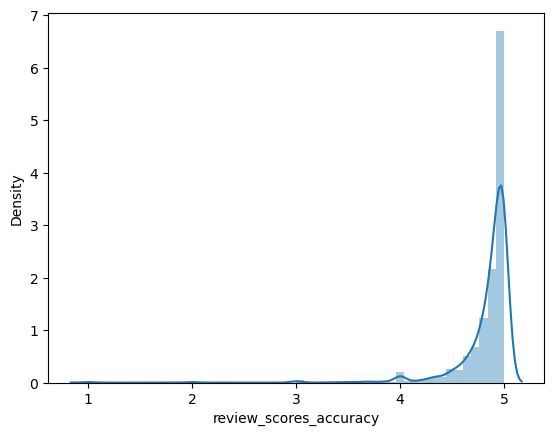

In [24]:
sp_untransformed = sns.distplot(df['review_scores_accuracy'])
print("Skewness: %f" % df['review_scores_accuracy'].skew())

In [25]:
#Fill empty dataPoints with median
for feature in {"review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", 
                "review_scores_communication", "review_scores_location","review_scores_value", 
                "reviews_per_month", "review_scores_rating"}:
    median = df[feature].median()
    df[feature].fillna(median, inplace=True)
    host_response_time_counts = df[feature].value_counts()

df['first_review_duration_in_days'].fillna(0, inplace=True)
df['last_review_duration_in_days'].fillna(0, inplace=True)
df.dropna(subset=["beds"], inplace=True)
df['bedrooms'].fillna(1, inplace=True)

In [26]:
from math import radians, sin, cos, sqrt, atan2

def distance_from_city_center(row, city_center):
    # Convert latitude and longitude to radians
    lat1, lon1 = radians(row['latitude']), radians(row['longitude'])
    lat2, lon2 = radians(city_center[0]), radians(city_center[1])

    # Calculate the distance between two points using the Haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a)) 
    distance = 6371 * c # 6371 is the radius of the Earth in kilometers
    print(row['latitude']) 
    print(row['longitude'])
    print(distance)
    return distance

# Determine the central point of the city
city_center = [47.6062, -122.3321] # latitude, longitude of Seattle
# Create a new feature called "distance from city center"
df['distance_from_city_center'] = df.apply(lambda row: distance_from_city_center(row, city_center), axis=1)

df.drop('latitude', axis=1, inplace=True)
df.drop('longitude', axis=1, inplace=True)

47.61503
-122.3475
1.515509472770136
47.65444
-122.33629
5.373224680941484
47.65608
-122.33602
5.55417593715513
47.67995
-122.30859
8.387637091138231
47.55017
-122.31937
6.303001940024206
47.55495
-122.38663
7.01460884008907
47.56612
-122.37273
5.398847291014134
47.60029
-122.30185
2.3612642428418362
47.67947
-122.37196
8.677280446701534
47.55627
-122.38607
6.8710362584548665
47.63815
-122.32344
3.6114785012091115
47.66316
-122.31276
6.497328017032514
47.65474
-122.35546
5.674165770432902
47.60096
-122.3019
2.337978964888375
47.6568
-122.31299
5.805830864204016
47.52383
-122.35287
9.29075128498113
47.62543
-122.32496
2.204237085253955
47.66617
-122.36693
7.160839021111821
47.65244
-122.35108
5.33474904038982
47.66938
-122.33516
7.029035572214247
47.65428
-122.33766
5.362462302405475
47.68726
-122.36279
9.302048136199323
47.70265
-122.31618
10.790836355114584
47.68205
-122.34275
8.471788761338212
47.62845
-122.32513
2.5286440557855014
47.65062
-122.32008
5.020740832862133
47.62734
-122.

47.58926
-122.3838
4.309988392190067
47.61914
-122.31846
1.7651519503345412
47.64244
-122.32269
4.090948158901231
47.52157
-122.26451
10.689924053474634
47.66221
-122.33724
6.239924967218902
47.61534
-122.34754
1.5403152900874195
47.61275
-122.30469
2.1800624435218623
47.66428
-122.36009
6.790199803634701
47.64239
-122.32284
4.083546325163743
47.64044
-122.32259
3.8734518914819054
47.6304778
-122.3101919
3.1597575108055196
47.66531
-122.36237
6.953050752865011
47.5976531
-122.3319768
0.9504168070204364
47.64259
-122.32332
4.099535798789133
47.64227
-122.32449
4.051147520705536
47.67778
-122.37802
8.67101152153531
47.60913
-122.32595
0.5645498557438875
47.56953
-122.2941
4.974723129881715
47.6565593
-122.3365746
5.609728254878227
47.68635
-122.33715
8.920298996097282
47.65687
-122.31481
5.781291492298731
47.65703
-122.31468
5.8008154093198705
47.68499
-122.32812
8.766120230467955
47.6082792
-122.330229
0.2704190336074309
47.58225
-122.31017
3.129933702212712
47.614418
-122.341721
1.1641

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6095 entries, 0 to 6165
Data columns (total 55 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_is_superhost                             6095 non-null   int64  
 1   host_listings_count                           6095 non-null   int64  
 2   host_total_listings_count                     6095 non-null   int64  
 3   host_has_profile_pic                          6095 non-null   int64  
 4   host_identity_verified                        6095 non-null   int64  
 5   neighbourhood_group_cleansed                  6095 non-null   object 
 6   accommodates                                  6095 non-null   int64  
 7   bedrooms                                      6095 non-null   float64
 8   beds                                          6095 non-null   float64
 9   price                                         6095 non-null   f

In [28]:
df.describe()

host_is_superhost  host_listings_count  host_total_listings_count  \
count        6095.000000          6095.000000                6095.000000   
mean            0.437080           397.332896                 462.342904   
std             0.496066          1205.680505                1354.976156   
min             0.000000             1.000000                   1.000000   
25%             0.000000             1.000000                   1.000000   
50%             0.000000             3.000000                   4.000000   
75%             1.000000            18.000000                  25.000000   
max             1.000000          4648.000000                5072.000000   

       host_has_profile_pic  host_identity_verified  accommodates  \
count           6095.000000             6095.000000   6095.000000   
mean               0.990812                0.879573      3.992453   
std                0.095420                0.325486      2.521052   
min                0.000000                0.000000      1.000000   
25%                1.000000                1.000000      2.000000   
50%                1.000000                1.000000      4.000000   
75%                1.000000                1.000000      5.000000   
max                1.000000                1.000000     16.000000   

          bedrooms         beds        price  minimum_nights  ...  \
count  6095.000000  6095.000000  6095.000000     6095.000000  ...   
mean      1.695324     2.121739   167.763413       12.320098  ...   
std       1.035251     1.465256   192.642172       17.771489  ...   
min       1.000000     1.000000    13.000000        1.000000  ...   
25%       1.000000     1.000000    90.000000        2.000000  ...   
50%       1.000000     2.000000   130.000000        3.000000  ...   
75%       2.000000     3.000000   196.500000       30.000000  ...   
max      11.000000    16.000000  8088.000000      365.000000  ...   

       host_verifications_email  host_verifications_work_email  \
count               6095.000000                    6095.000000   
mean                   0.998523                       0.217391   
std                    0.038402                       0.412505   
min                    0.000000                       0.000000   
25%                    1.000000                       0.000000   
50%                    1.000000                       0.000000   
75%                    1.000000                       0.000000   
max                    1.000000                       1.000000   

       room_type_Entire home/apt  room_type_Private room  bathrooms_number  \
count                6095.000000             6095.000000       6095.000000   
mean                    0.849385                0.148646          1.393027   
std                     0.357703                0.355769          0.705975   
min                     0.000000                0.000000          0.000000   
25%                     1.000000                0.000000          1.000000   
50%                     1.000000                0.000000          1.000000   
75%                     1.000000                0.000000          2.000000   
max                     1.000000                1.000000         16.000000   

       amenities_number  property_type_other  property_type_room  \
count       6095.000000          6095.000000         6095.000000   
mean          39.614766             0.005086            0.151600   
std           15.349027             0.071141            0.358662   
min            1.000000             0.000000            0.000000   
25%           29.000000             0.000000            0.000000   
50%           37.000000             0.000000            0.000000   
75%           51.000000             0.000000            0.000000   
max          104.000000             1.000000            1.000000   

       property_type_wholeUnit  distance_from_city_center  
count              6095.000000                6095.000000  
mean                  0.843314                 

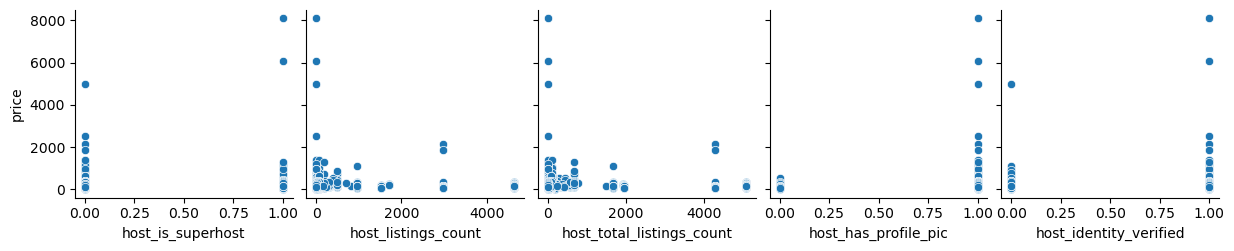

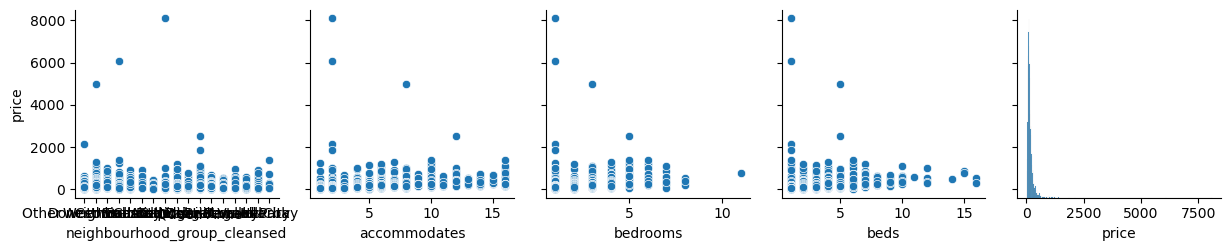

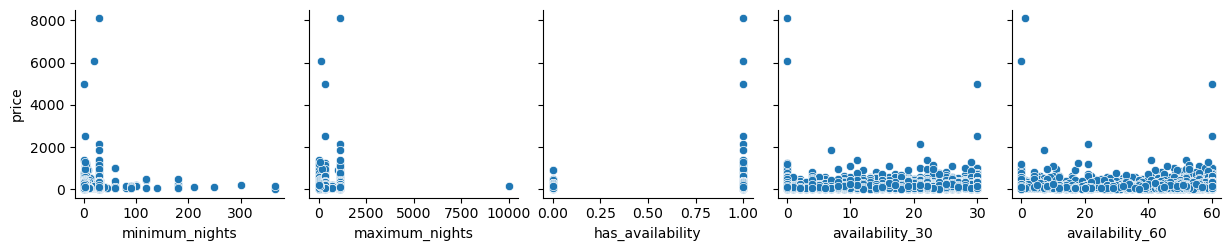

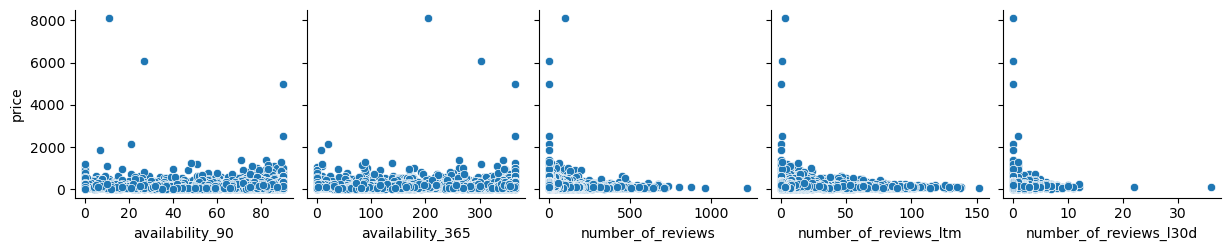

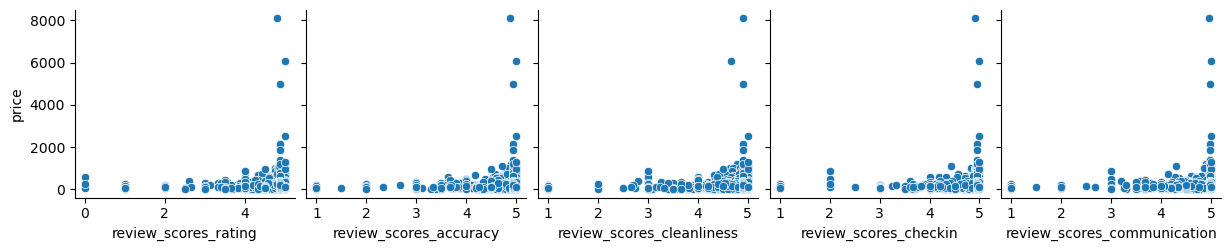

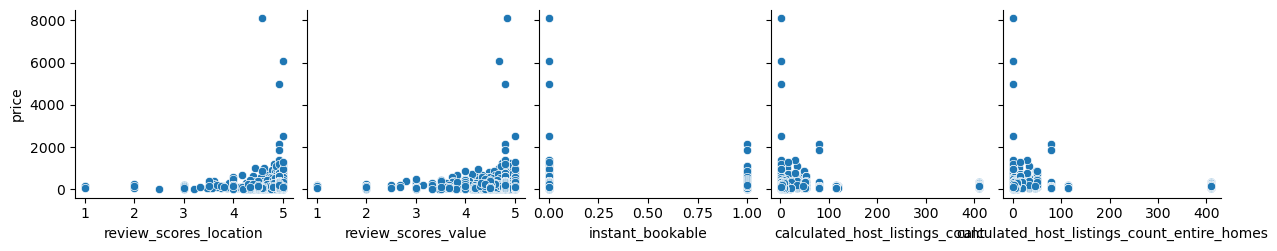

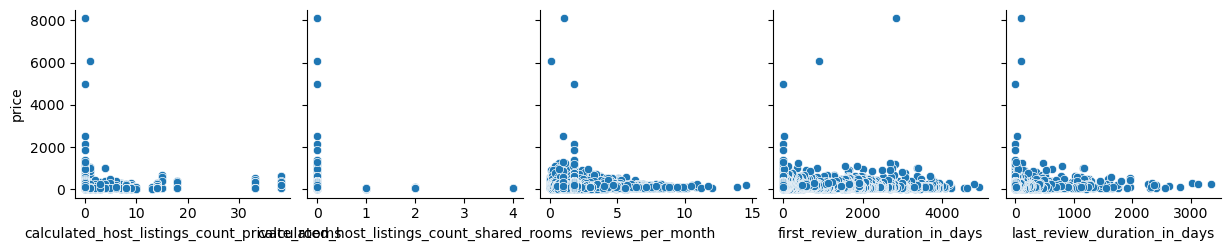

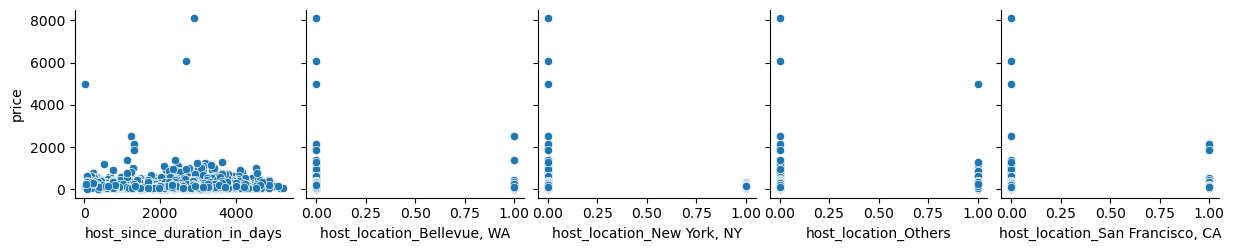

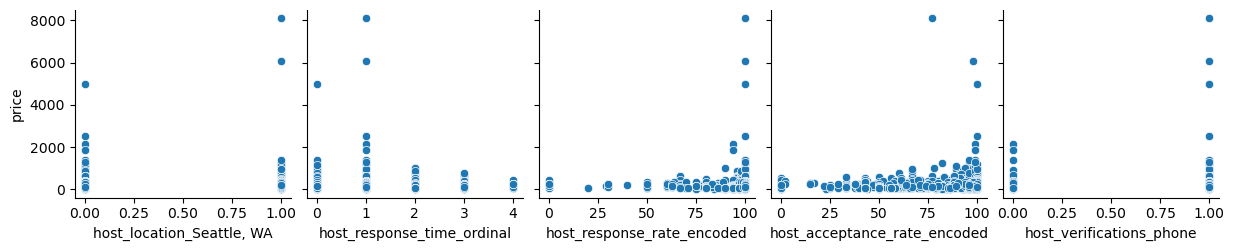

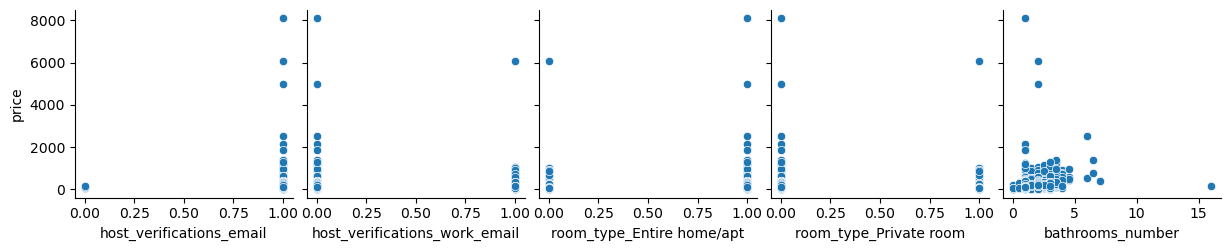

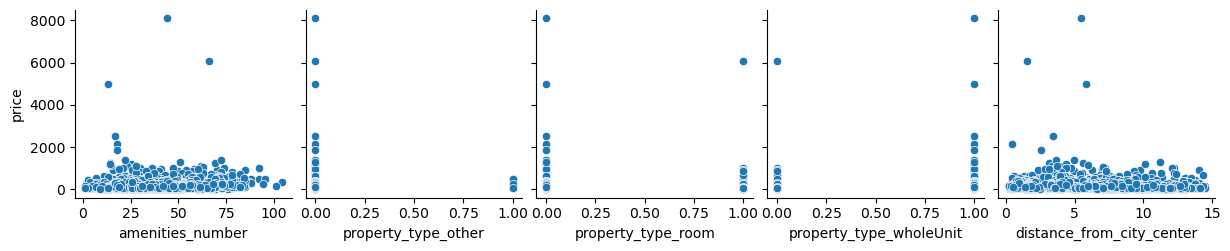

In [29]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['price'])

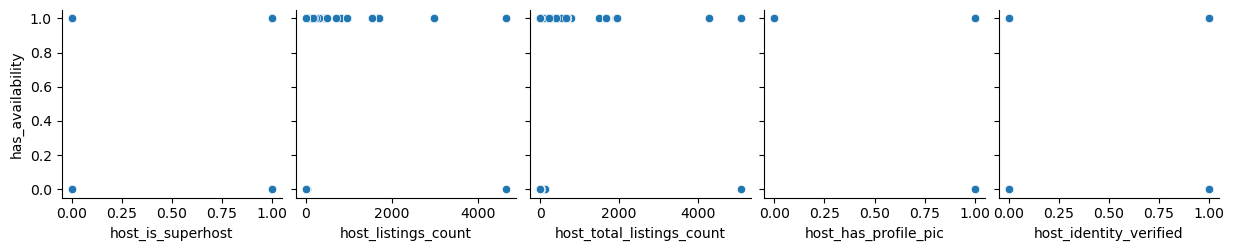

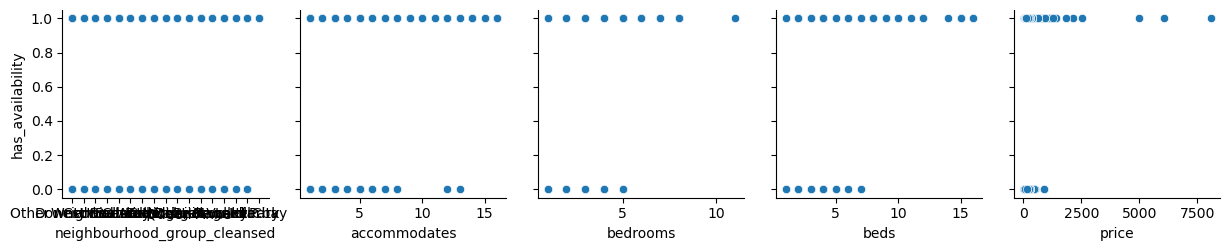

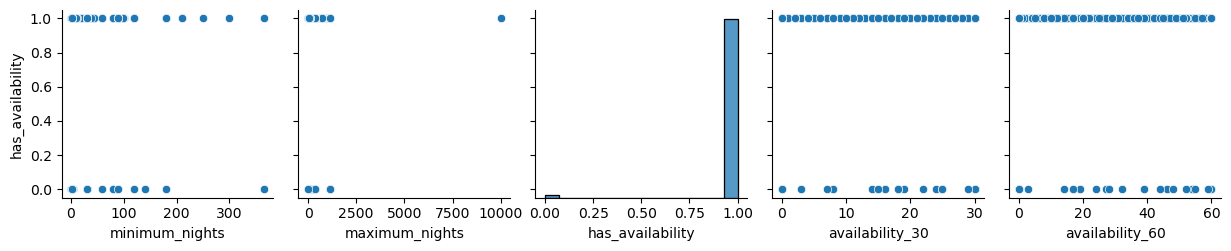

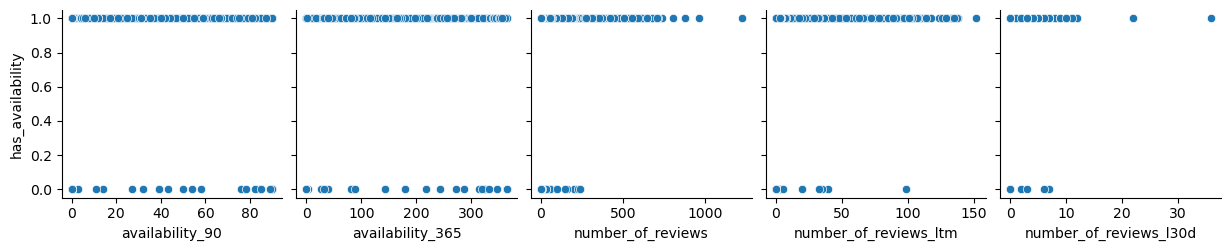

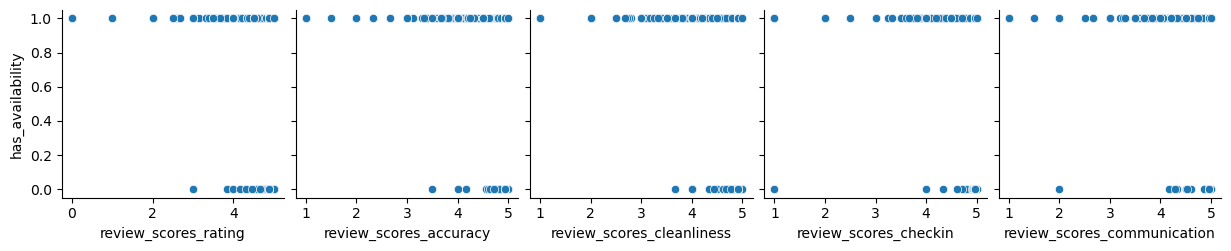

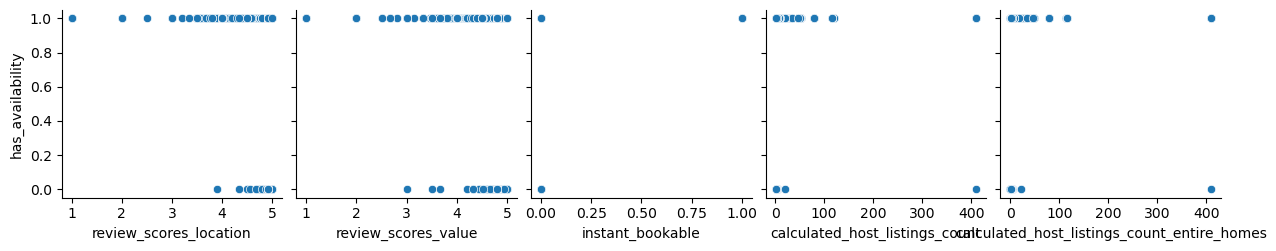

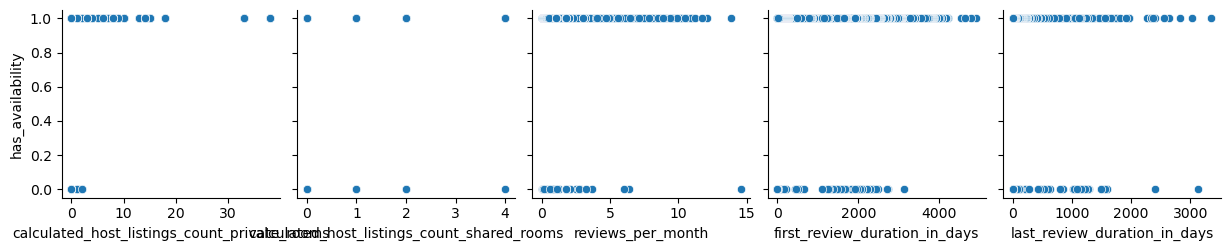

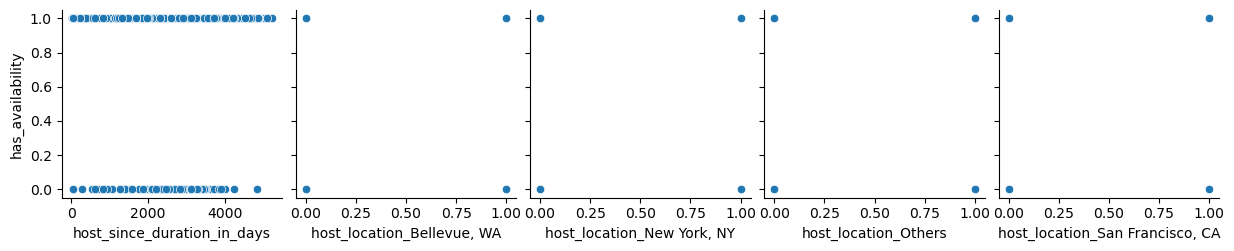

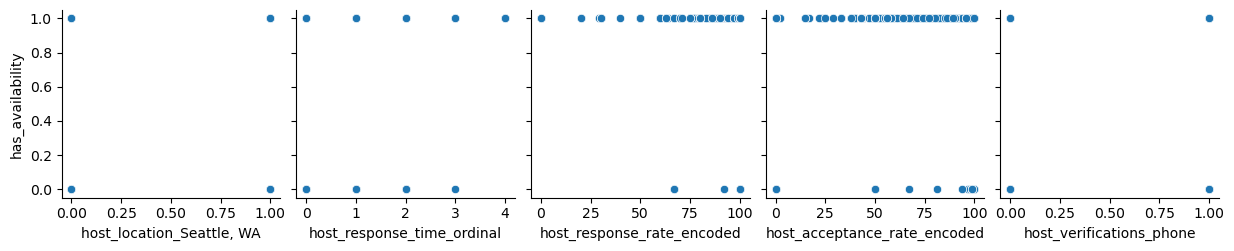

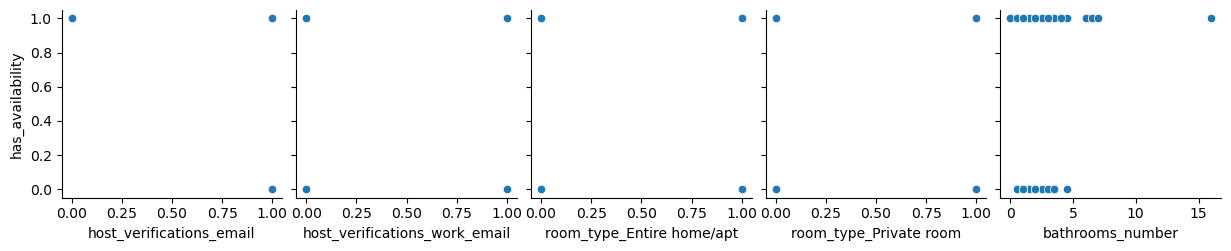

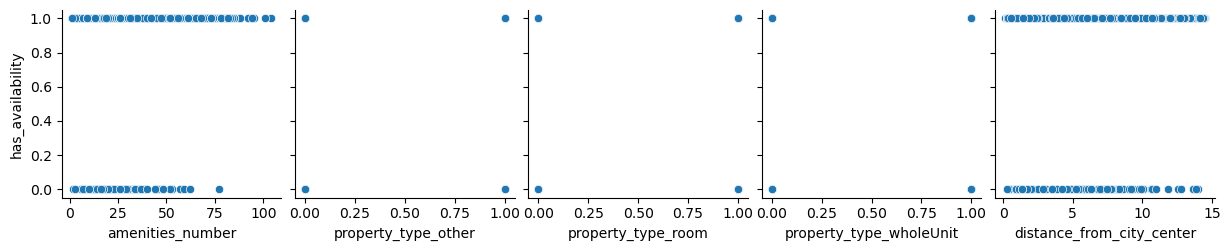

In [30]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['has_availability'])

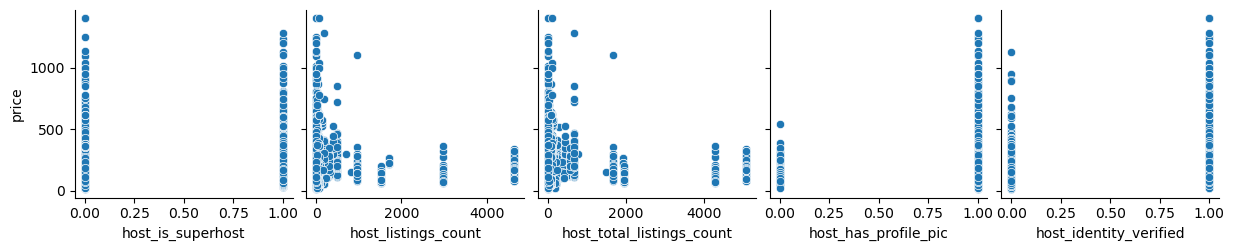

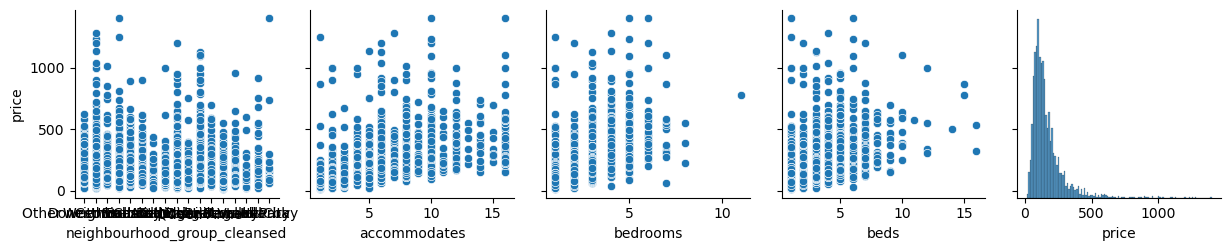

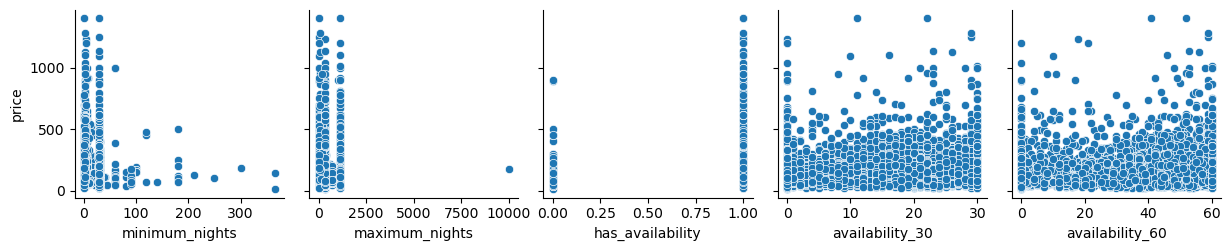

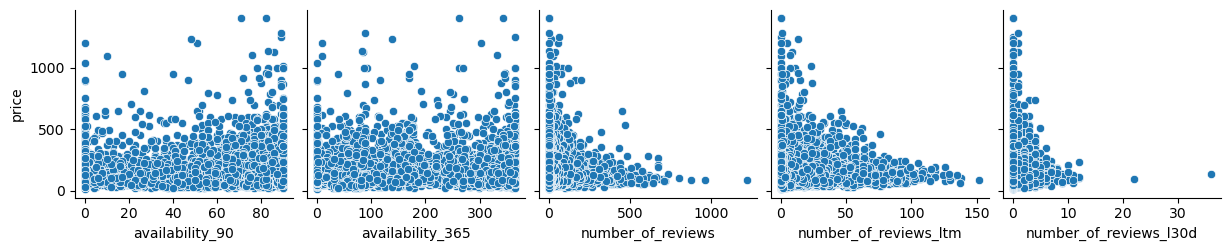

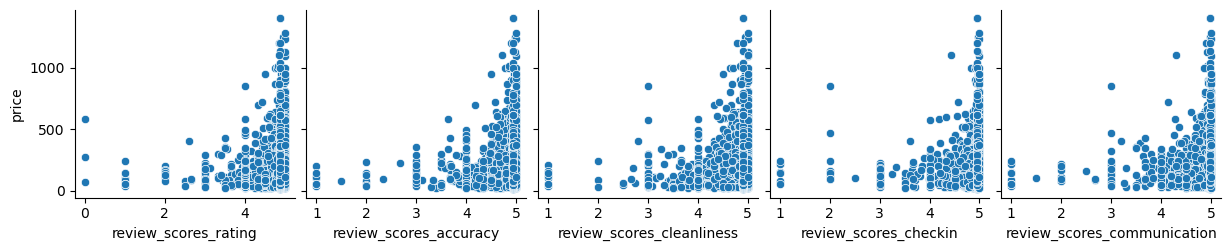

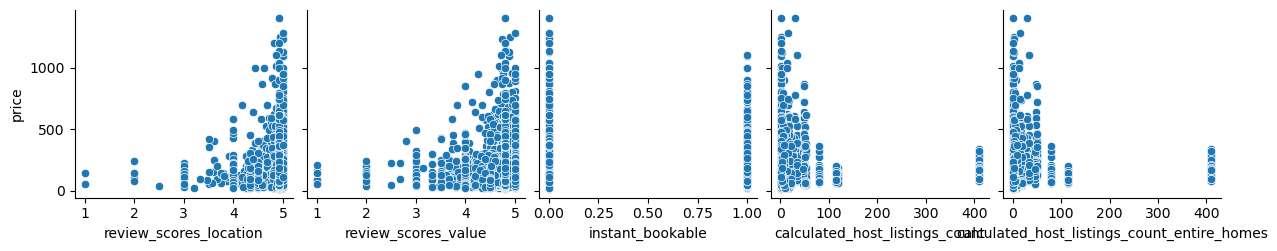

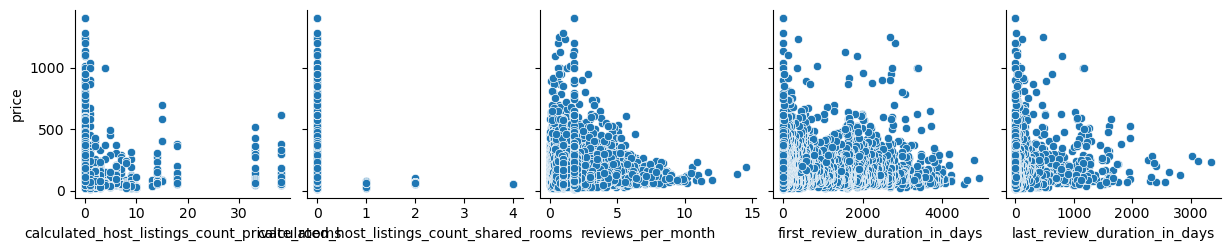

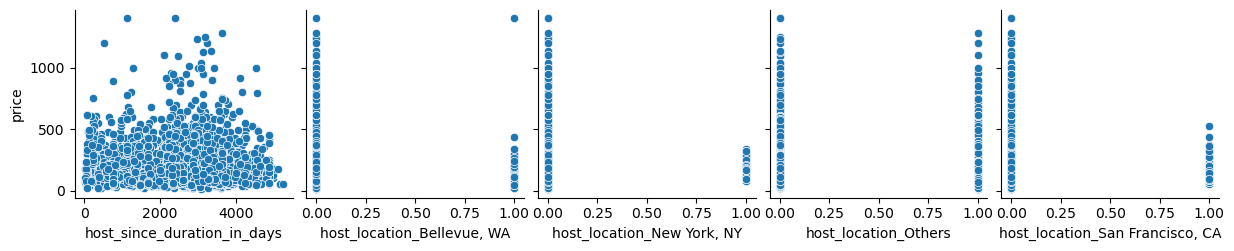

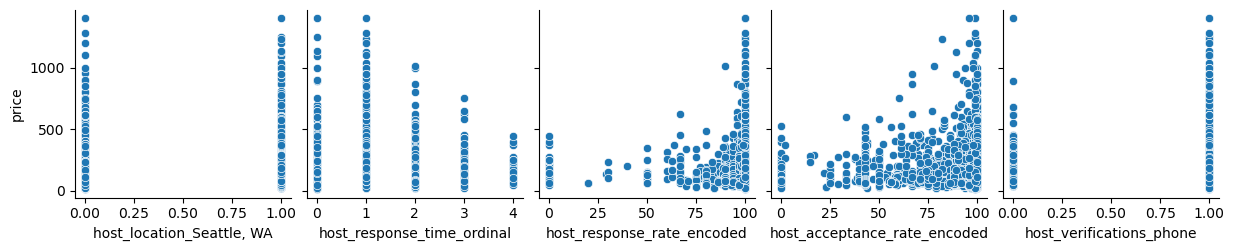

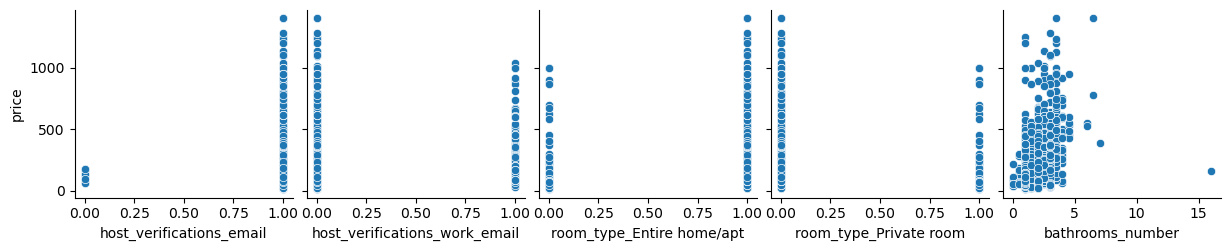

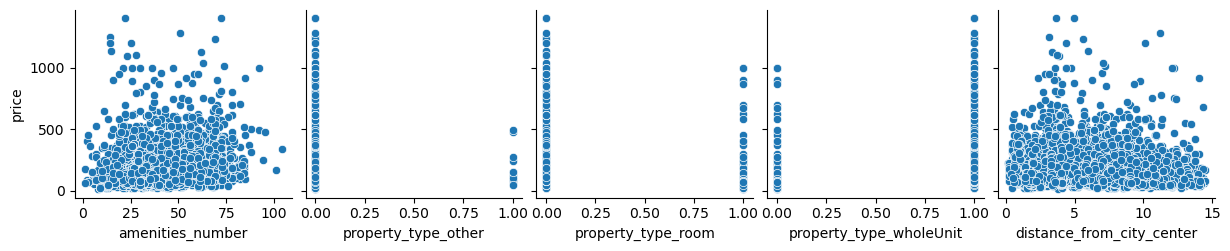

In [31]:
df = df[df['price'] <= 1500]
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['price'])

C:\Users\Utilisateur\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 3.276773


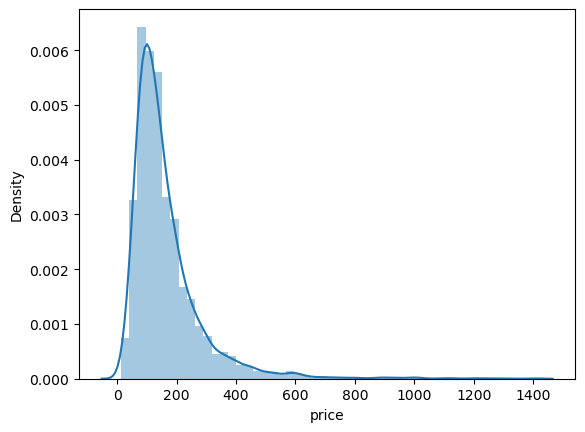

In [32]:
sns.distplot(df['price'])
print("Skewness: %f" % df['price'].skew())

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_27368\2334102190.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = df.skew()
C:\Users\Utilisateur\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Not Boolean host_listings_count
Not Boolean host_total_listings_count
Not Boolean accommodates
Not Boolean bedrooms
Not Boolean beds
Not Boolean price
Not Boolean minimum_nights
Not Boolean maximum_nights
Not Boolean number_of_reviews
Not Boolean number_of_reviews_ltm
Not Boolean number_of_reviews_l30d
Not Boolean review_scores_rating
Not Boolean review_scores_accuracy
Not Boolean review_scores_cleanliness
Not Boolean review_scores_checkin
Not Boolean review_scores_communication
Not Boolean review_scores_location
Not Boolean review_scores_value
Not Boolean calculated_host_listings_count
Not Boolean calculated_host_listings_count_entire_homes
Not Boolean calculated_host_listings_count_private_rooms
Not Boolean calculated_host_listings_count_shared_rooms
Not Boolean reviews_per_month
Not Boolean first_review_duration_in_days
Not Boolean last_review_duration_in_days
Not Boolean host_response_time_ordinal
Not Boolean host_response_rate_encoded
Not Boolean host_acceptance_rate_encoded
Not B

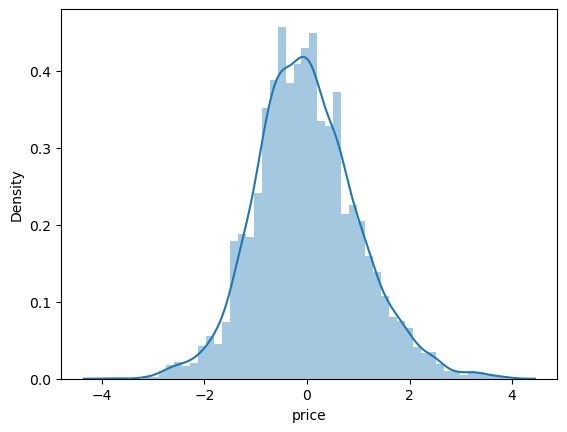

In [33]:
#log transformation to skewed data
skewness = df.skew()
for feature, skew in skewness.items():
    if skew > 1 or skew < -1: 
        if df[feature].nunique() != 2 or set(df[feature].unique()) != {0, 1}:
            print("Not Boolean " + feature)
            df[feature] = np.log1p(df[feature])
        

#Standard scaler for continuous data
scaler = StandardScaler()
continuous_cols = [
'host_listings_count',
'host_total_listings_count',
'accommodates',
'bedrooms',
'beds',
'price',
'minimum_nights',
'maximum_nights',
'availability_30',
'availability_60',
'availability_90',
'availability_365',
'number_of_reviews',
'number_of_reviews_ltm',
'number_of_reviews_l30d',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'calculated_host_listings_count',
'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms',
'calculated_host_listings_count_shared_rooms',
'reviews_per_month',
'last_review_duration_in_days',
'host_since_duration_in_days',
'first_review_duration_in_days',
'host_response_time_ordinal',
'host_acceptance_rate_encoded',
'host_response_rate_encoded',
'bathrooms_number',
'amenities_number',
'distance_from_city_center']
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

sns.distplot(df['price'])
print("Skewness: %f" % df['price'].skew())

#df.describe()

In [34]:
hous_num = df.select_dtypes(include = ['float64', 'int64'])
hous_num_corr = df.corr()['price'] # -1 means that the latest row is price 
top_features = hous_num_corr[abs(hous_num_corr) > 0.6].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5 
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 4 strongly correlated values with SalePrice:
price           1.000000
accommodates    0.651391
bedrooms        0.648361
beds            0.606225
Name: price, dtype: float64


In [35]:
correlation_matrix = df.corr()

# print the correlation matrix
#print(correlation_matrix)
np.fill_diagonal(correlation_matrix.values, 0)
pairs = np.where(correlation_matrix.abs() > 0.6)
# convert pairs to a list of tuples
pairs_list = list(zip(pairs[0], pairs[1]))

# create a set to keep track of visited features
visited = set()

# loop through pairs and print the corresponding features
for pair in pairs_list:
    if pair[0] not in visited and pair[1] not in visited:
        feature1 = correlation_matrix.columns[pair[0]]
        feature2 = correlation_matrix.columns[pair[1]]
        print(f"{feature1} and {feature2} are highly correlated (correlation = {correlation_matrix.iloc[pair]}).")
        visited.add(pair[0])
        visited.add(pair[1])
        
print(hous_num_corr)

host_listings_count and host_total_listings_count are highly correlated (correlation = 0.9897085191429362).
accommodates and bedrooms are highly correlated (correlation = 0.8291644937979924).
beds and price are highly correlated (correlation = 0.6062245761098685).
minimum_nights and number_of_reviews_ltm are highly correlated (correlation = -0.6622826534720452).
availability_30 and availability_60 are highly correlated (correlation = 0.916687959124829).
number_of_reviews and first_review_duration_in_days are highly correlated (correlation = 0.8433325819913186).
number_of_reviews_l30d and reviews_per_month are highly correlated (correlation = 0.6156297893167085).
review_scores_rating and review_scores_accuracy are highly correlated (correlation = 0.7129987656827512).
review_scores_cleanliness and review_scores_value are highly correlated (correlation = 0.6721893066800787).
review_scores_checkin and review_scores_communication are highly correlated (correlation = 0.7286895331316421).
cal

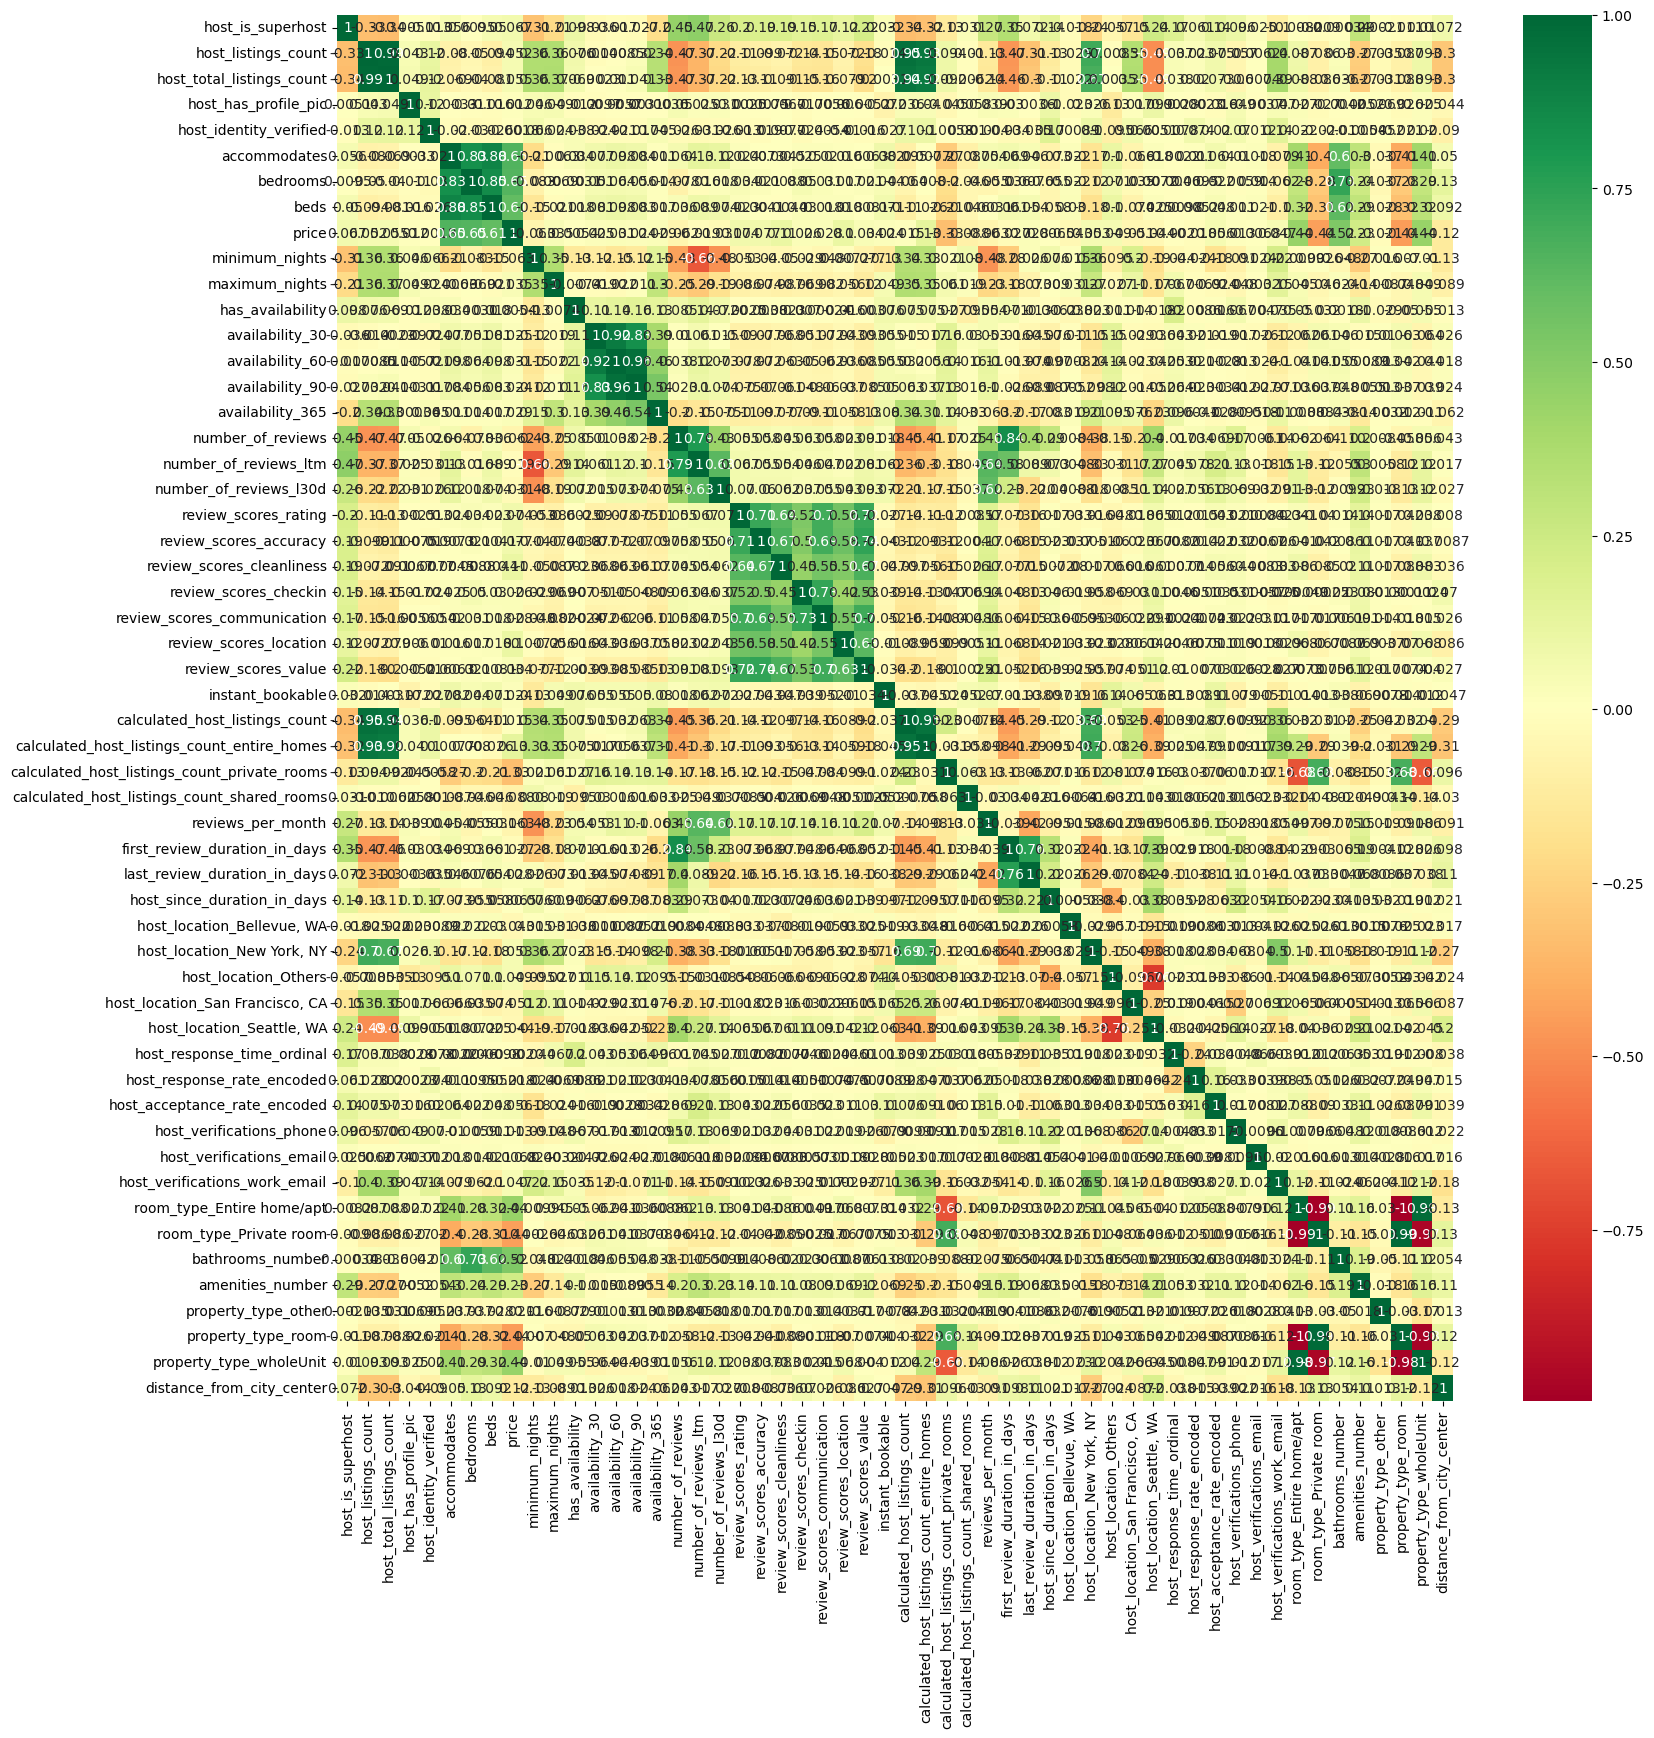

In [36]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [37]:
#Drop highly correlated features
df.drop(['host_total_listings_count',
         'availability_30',
         'availability_60',
         'availability_90',
         'calculated_host_listings_count_entire_homes',
         'room_type_Private room',
         'property_type_room',
        ], axis=1, inplace=True)

In [ ]:
df.drop(['availability_365', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 
         'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
         'review_scores_communication', 'review_scores_location', 'review_scores_value',
         'reviews_per_month', 'host_location_Bellevue, WA', 
         'host_location_New York, NY', 'host_location_Others', 'host_location_San Francisco, CA', 
         'host_location_Seattle, WA', 'host_response_time_ordinal'], axis=1, inplace=True)
#, 'host_verifications_phone', 'host_verifications_email', 
  #       'host_verifications_work_email'


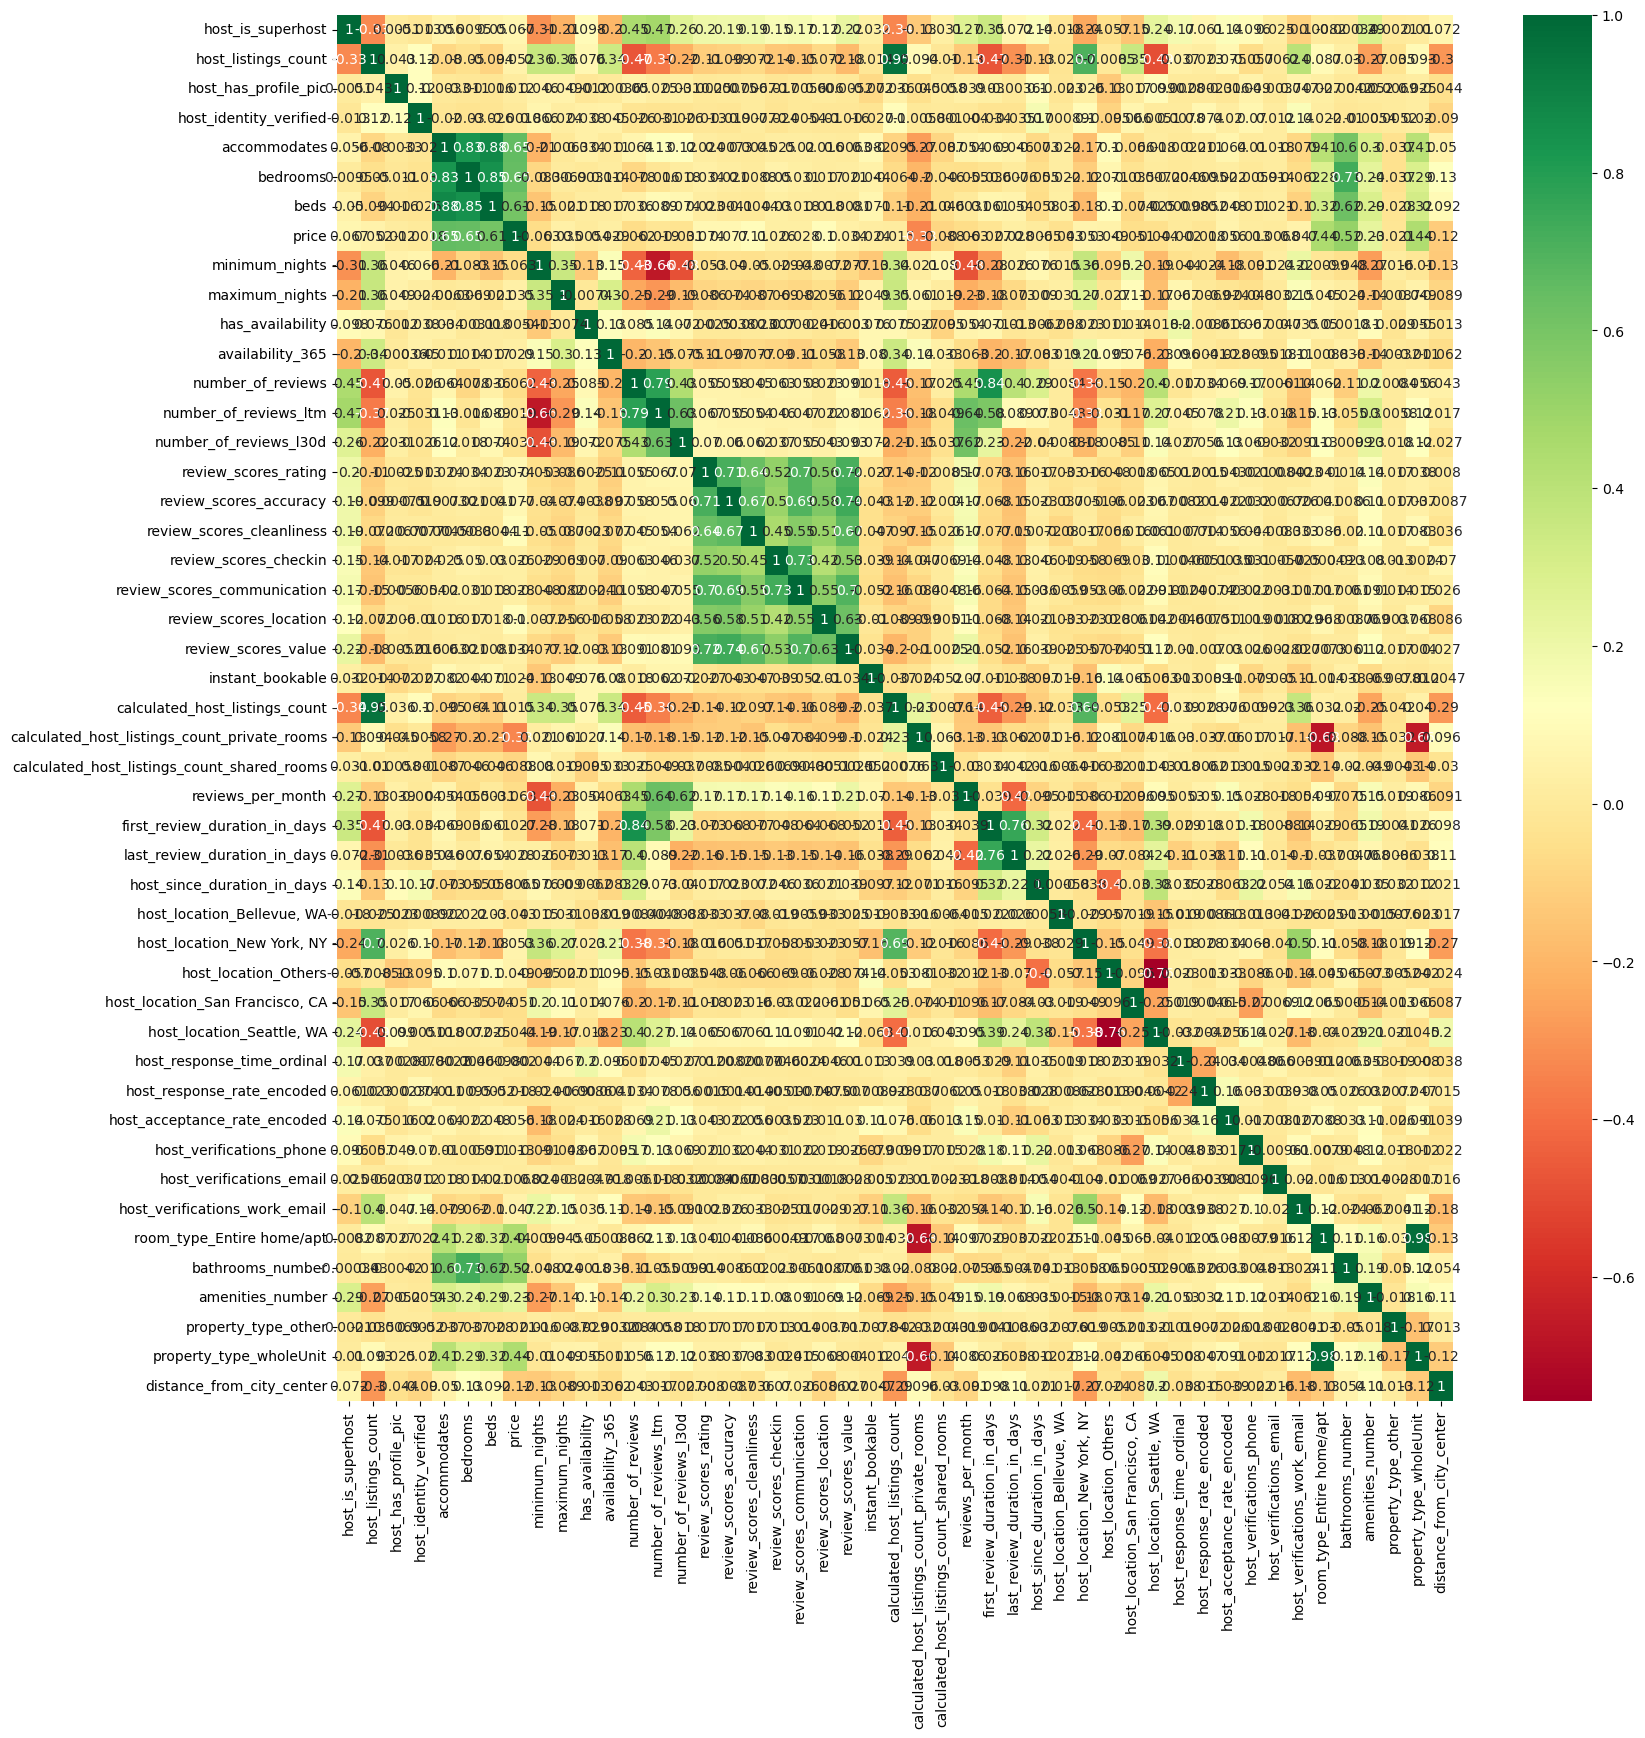

In [38]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

plt.show()

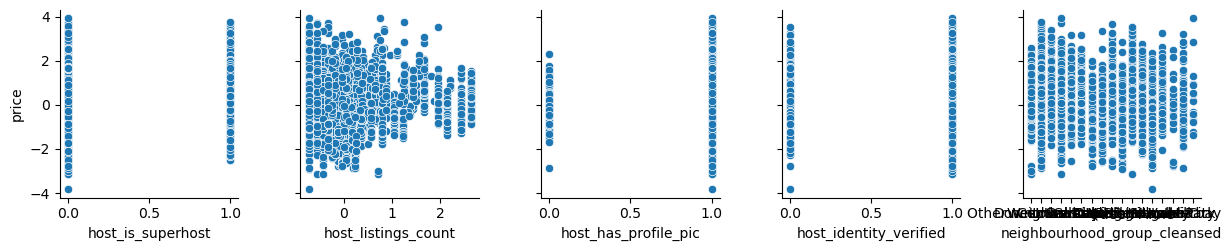

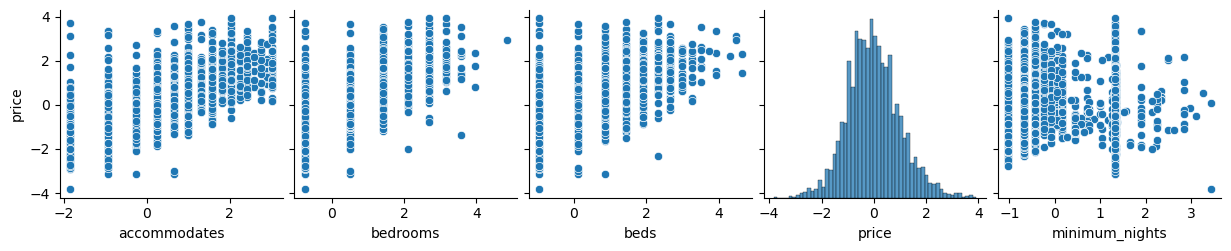

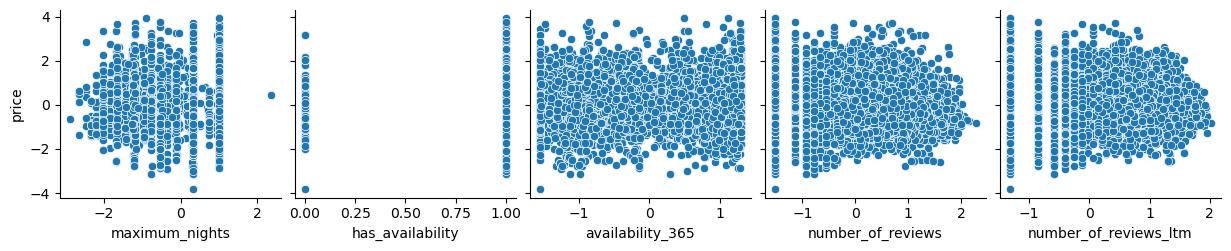

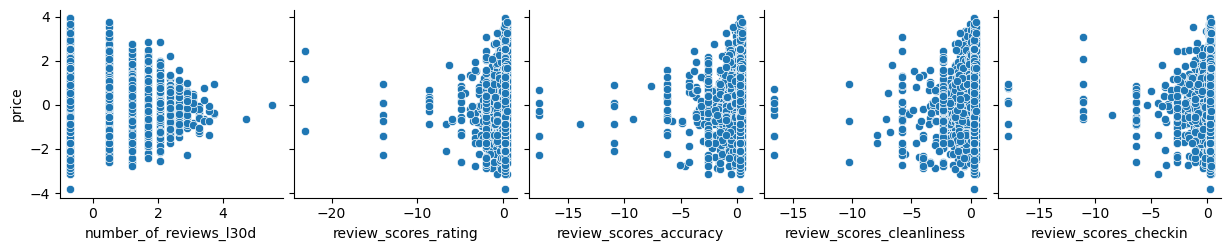

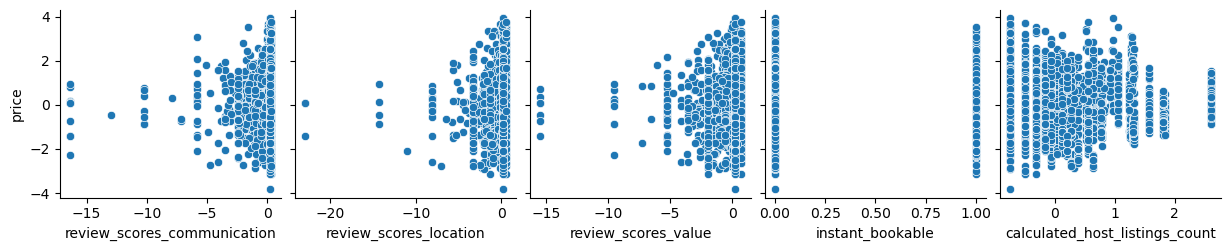

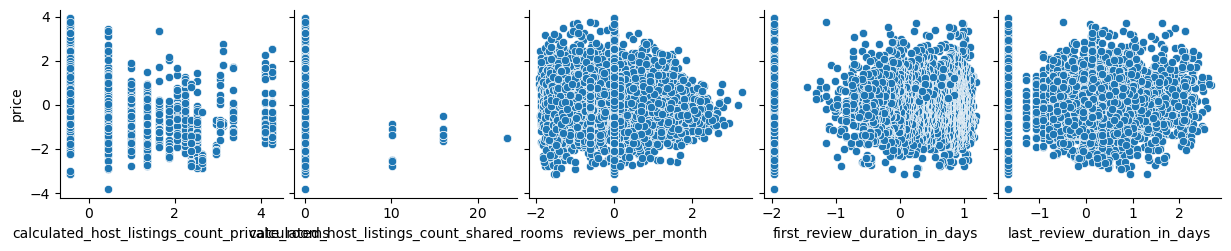

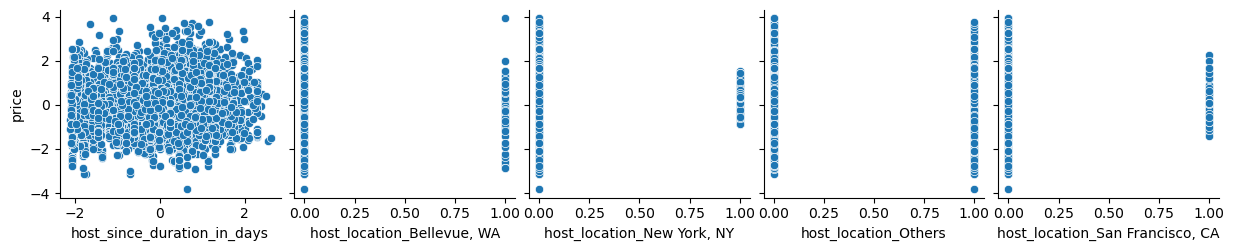

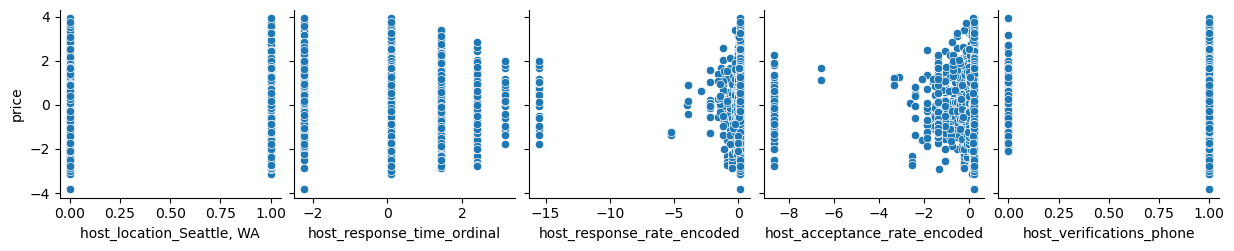

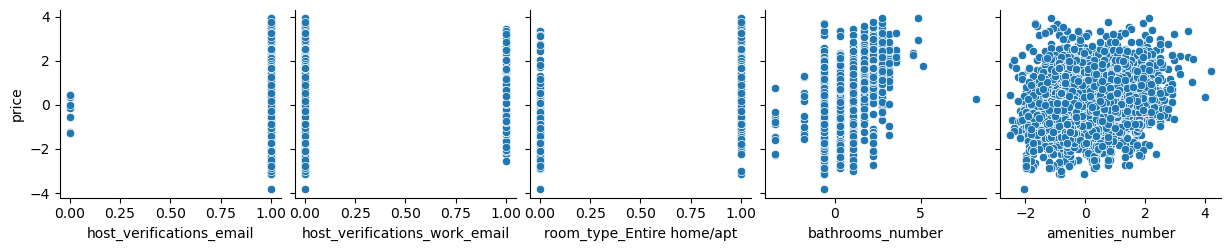

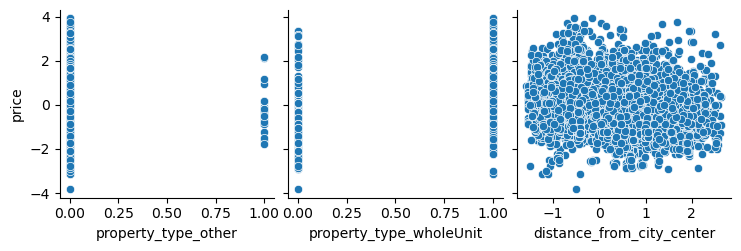

In [39]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['price'])

In [42]:
print(df['neighbourhood_group_cleansed'].value_counts(dropna=False))

Other neighborhoods    1228
Downtown                790
Capitol Hill            529
Central Area            511
Queen Anne              418
West Seattle            408
Ballard                 365
Rainier Valley          363
Cascade                 298
Beacon Hill             279
University District     223
Northgate               218
Delridge                191
Lake City               110
Magnolia                 90
Seward Park              51
Interbay                 17
Name: neighbourhood_group_cleansed, dtype: int64


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6089 entries, 0 to 6165
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_is_superhost                             6089 non-null   int64  
 1   host_listings_count                           6089 non-null   float64
 2   host_has_profile_pic                          6089 non-null   int64  
 3   host_identity_verified                        6089 non-null   int64  
 4   neighbourhood_group_cleansed                  6089 non-null   object 
 5   accommodates                                  6089 non-null   float64
 6   bedrooms                                      6089 non-null   float64
 7   beds                                          6089 non-null   float64
 8   price                                         6089 non-null   float64
 9   minimum_nights                                6089 non-null   f

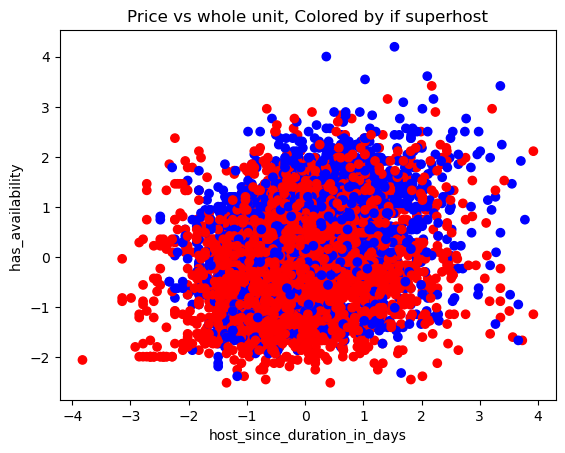

In [44]:
color_dict = {1: 'blue', 0: 'red'}
#colors = df[''].map(color_dict)
#colors = df['instant_bookable'].map(color_dict)
colors = df['host_is_superhost'].map(color_dict)
#calculated_host_listings_count
plt.scatter(df['price'], df['amenities_number'], c=colors)
#plt.scatter(df['price'], df['property_type_wholeUnit'], c=colors)

# Add axis labels and a title
plt.xlabel('host_since_duration_in_days')
plt.ylabel('has_availability ')
plt.title('Price vs whole unit, Colored by if superhost')

# Display the plot
plt.show()

In [45]:
df.columns

Index(['host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed',
       'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'first_review_duration_in_days', 'last_review_duration_in_days',
       'host_since_duration_in_days', 'host_location_Bellevue, WA',
       'host_location_New York, NY', 'host_location_Others',
       'host_location_San Francisco, CA', 

In [46]:
# Hypothesis testing
whole_units = df.loc[df['property_type_wholeUnit'], :]
non_whole_units = df.loc[~df['property_type_wholeUnit'], :]


In [47]:
from scipy.stats import ttest_ind

tstat, pval = ttest_ind(whole_units['price'], non_whole_units['price'], equal_var=False)

print('t-statistic:', tstat)
print('p-value:', pval)

t-statistic: -68.16122565194011
p-value: 0.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6089 entries, 0 to 6165
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_is_superhost                             6089 non-null   int64  
 1   host_listings_count                           6089 non-null   float64
 2   host_has_profile_pic                          6089 non-null   int64  
 3   host_identity_verified                        6089 non-null   int64  
 4   neighbourhood_group_cleansed                  6089 non-null   object 
 5   accommodates                                  6089 non-null   float64
 6   bedrooms                                      6089 non-null   float64
 7   beds                                          6089 non-null   float64
 8   price                                         6089 non-null   float64
 9   minimum_nights                                6089 non-null   f